Enter task name: math
Enter hours spent: 2
Enter hours required: 8
Enter date: 12/2/23
Do you want a graph for the daily or monthly data? daily


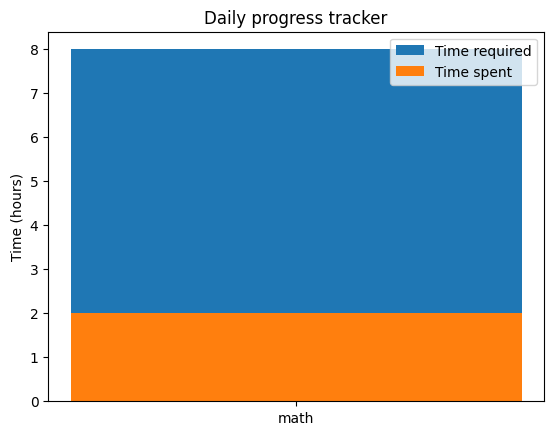

In [3]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import matplotlib.pyplot as plt

# take user inputs

task_name = input("Enter task name: ")
hours_spent = float(input("Enter hours spent: "))
hours_required = float(input("Enter hours required: "))
date = input("Enter date: ")

# create Excel workbook if it does not exist
try:
    wb = openpyxl.load_workbook('file.xlsx')
except FileNotFoundError:
    wb = Workbook()
    ws = wb.active
    ws.title = task_name
    ws.append(['Date', 'Hours Spent', 'Hours Required'])

# check if worksheet for task exists, create it if it does not 
if task_name not in wb.sheetnames:
    ws = wb.create_sheet(title=task_name)
    ws.append(['Date', 'Hours Spent', 'Hours Required'])
else:
    ws = wb[task_name]

# append data to worksheet
ws.append([date, hours_spent, hours_required])

# save workbook
wb.save('file.xlsx')



while True:
    ques = input("Do you want a graph for the daily or monthly data? ")
    if ques.lower() == 'daily':
        

        # Create a bar chart
        plt.bar(task_name, hours_required, label='Time required')
        plt.bar(task_name, hours_spent, label='Time spent')

        # Set the title and labels
        plt.title('Daily progress tracker')
        
        plt.ylabel('Time (hours)')

        # Show the legend
        plt.legend()

        # Display the chart
        plt.show()

        
        break
        
        
    elif ques.lower() == 'monthly':
        
        wb = openpyxl.load_workbook('file.xlsx')
        ws_name = task_name
        ws = wb[ws_name]

        # Extract the task names, time spent, and time required for each task
        task_names = []
        time_spent = []
        time_required = []
        for row in ws.iter_rows(min_row=2, values_only=True):
            task_names.append(row[0])
            time_spent.append(row[1])
            time_required.append(row[2])
        
        fig, ax = plt.subplots()

        # Set the width of the bars
        bar_width = 0.35

        # Create the bars for time spent and time required
        bar1 = ax.bar(range(len(task_names)), time_spent, bar_width, label='Time Spent')
        bar2 = ax.bar([i + bar_width for i in range(len(task_names))], time_required, bar_width, label='Time Required')

        # Set the axis labels and title
        ax.set_xlabel('Task Name')
        ax.set_ylabel('Time (hours)')
        ax.set_title('Time Spent vs. Time Required by Task - {}'.format(ws_name))

        # Set the x ticks and tick labels
        ax.set_xticks([i + bar_width / 2 for i in range(len(task_names))])
        ax.set_xticklabels(task_names)

        # Add a legend
        ax.legend()

        # Show the plot
        plt.show()
        
        break
        
        
